In [1]:
import sys
from pathlib import Path

project_root = Path.cwd().parent
sys.path.append(str(project_root / 'src'))
sys.path.append(str(project_root))

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Aggiungi il percorso corretto al modulo src
project_src_path = Path.cwd().parent / 'src'
sys.path.append(str(project_src_path))

# Importa i moduli corretti senza 'src.'
from model.efficient_frontier.markowitz_optimizer import MarkowitzOptimizer
from model.postprocessing.visualizer import Visualizer


INFO:model.efficient_frontier.markowitz_optimizer:Logger configurato per il modulo model.efficient_frontier.markowitz_optimizer
INFO:model.postprocessing.visualizer:Logger configurato per il modulo model.postprocessing.visualizer


In [2]:
# Configurazione perscorsi
#DATA_PATH = Path('../data/processed/returns.csv')
DATA_PATH = Path('../data/raw')
OUTPUT_PATH = Path('../results')
OUTPUT_PATH.mkdir(exist_ok=True)

In [3]:
def load_and_preprocess_data(data_path: Path) -> pd.DataFrame:
    """Carica e prepara i dati storici"""
    stocks = ['AAPL', 'GOOGL', 'MSFT']
    
    # Leggi e combina i CSV
    dfs = []
    for ticker in stocks:
        df = pd.read_csv(
            data_path / f"{ticker}.csv",
            parse_dates=['Date'],
            usecols=['Date', 'Close'],
            index_col='Date'
        )
        df.columns = [ticker]
        dfs.append(df)
    
    combined = pd.concat(dfs, axis=1)
    return combined.ffill().dropna()

prices = load_and_preprocess_data(DATA_PATH)
prices.head(10)

,AAPL,GOOGL,MSFT
Date,,,
2020-01-02,72.716064,68.108376,153.323288
2020-01-03,72.009125,67.752075,151.414093
2020-01-06,72.582916,69.557945,151.805496
2020-01-07,72.241547,69.423592,150.421371
2020-01-08,73.403648,69.917725,152.817322
2020-01-09,74.962791,70.651718,154.726501
2020-01-10,75.132271,71.108025,154.010559
2020-01-13,76.737419,71.658897,155.862427
2020-01-14,75.701218,71.189148,154.764709


Statistiche returns:
              AAPL        GOOGL         MSFT
count  1005.000000  1005.000000  1005.000000
mean      0.000963     0.000710     0.000883
std       0.021137     0.021151     0.020555
min      -0.137708    -0.123685    -0.159453
25%      -0.009169    -0.009654    -0.009491
50%       0.000988     0.001056     0.000978
75%       0.012662     0.011989     0.011953
max       0.113157     0.088388     0.132929

Media giornaliera: AAPL     0.000963
GOOGL    0.000710
MSFT     0.000883
dtype: float64


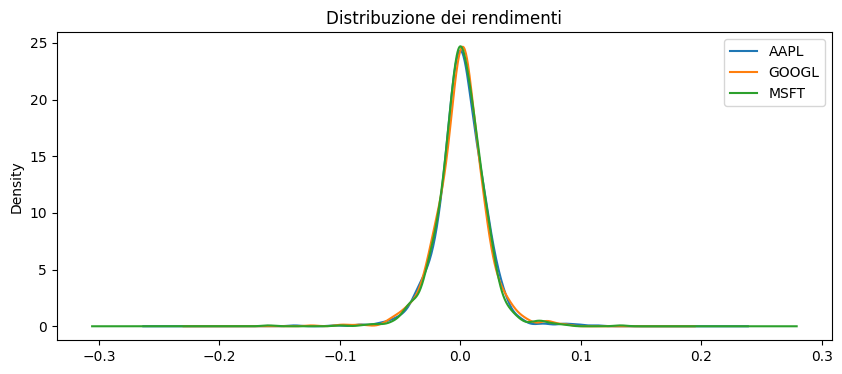

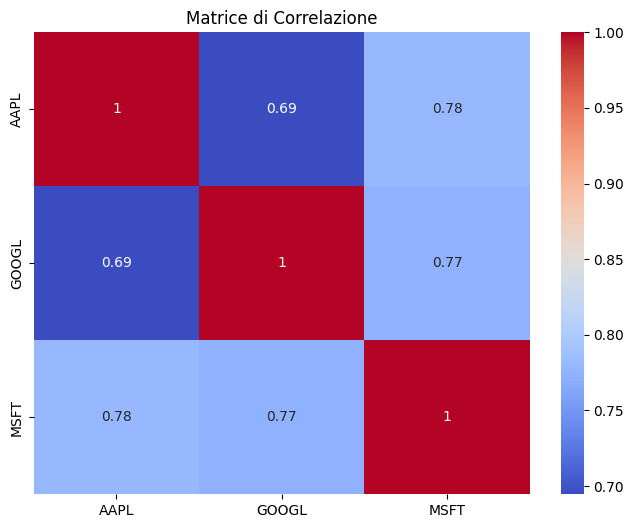

In [4]:
returns = np.log(prices / prices.shift(1)).dropna()
returns.plot(kind='kde', figsize=(10, 4))
plt.title('Distribuzione dei rendimenti')

# Controllo preliminare sui returns
print("Statistiche returns:")
print(returns.describe())
print("\nMedia giornaliera:", returns.mean().round(6))

# Eventuale normalizzazione se i valori sono troppo piccoli
returns = returns * 100  # Scala a percentuale se necessario

# Verifica correlazione
corr_matrix = returns.corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Matrice di Correlazione');

In [5]:
returns = returns * 100  # Scala i rendimenti per evitare problemi di numeri troppo piccoli
optimizer = MarkowitzOptimizer(returns=returns)
print(optimizer.returns)
frontier = optimizer.efficient_frontier()
print(f"Frontier: {frontier}")
sharpes = optimizer.max_sharpe_ratio()
print(f"Sharpes: {sharpes}")

INFO:model.efficient_frontier.markowitz_optimizer:Configurazione caricata da: parameters/model_parameters.yaml
INFO:model.efficient_frontier.markowitz_optimizer:Stima della matrice di covarianza
INFO:model.efficient_frontier.markowitz_optimizer:Matrice di covarianza stimata con Ledoit-Wolf
INFO:model.efficient_frontier.markowitz_optimizer:Validazione dei dati di input
INFO:model.efficient_frontier.markowitz_optimizer:Calcolo della frontiera efficiente
INFO:model.efficient_frontier.markowitz_optimizer:Target di ritorno: [0.005      0.00552632 0.00605263 0.00657895 0.00710526 0.00763158
 0.00815789 0.00868421 0.00921053 0.00973684 0.01026316 0.01078947
 0.01131579 0.01184211 0.01236842 0.01289474 0.01342105 0.01394737
 0.01447368 0.015     ]
INFO:model.efficient_frontier.markowitz_optimizer:Ottimizzazione per target di ritorno: 0.005
INFO:model.efficient_frontier.markowitz_optimizer:Calcolo del rendimento atteso del portafoglio
INFO:model.efficient_frontier.markowitz_optimizer:Portafogli

                  AAPL       GOOGL        MSFT
Date                                          
2020-01-03  -97.694855  -52.451051 -125.302641
2020-01-06   79.367372  263.050603   25.816499
2020-01-07  -47.142624  -19.334033  -91.595724
2020-01-08  159.583213   70.924415  158.027338
2020-01-09  210.182365  104.432398  124.158189
...                ...         ...         ...
2023-12-22  -55.628941   75.910182   27.801328
2023-12-26  -28.449772    2.121448    2.136504
2023-12-27    5.178276  -81.593875  -15.759018
2023-12-28   22.238303   -9.979293   32.293668
2023-12-29  -54.389478  -38.581351   20.230764

[1005 rows x 3 columns]


INFO:model.efficient_frontier.markowitz_optimizer:Calcolo del rendimento atteso del portafoglio
INFO:model.efficient_frontier.markowitz_optimizer:Portafoglio di volatilità calcolata
INFO:model.efficient_frontier.markowitz_optimizer:Calcolo del rendimento atteso del portafoglio
INFO:model.efficient_frontier.markowitz_optimizer:Portafoglio di volatilità calcolata
INFO:model.efficient_frontier.markowitz_optimizer:Calcolo del rendimento atteso del portafoglio
INFO:model.efficient_frontier.markowitz_optimizer:Portafoglio di volatilità calcolata
INFO:model.efficient_frontier.markowitz_optimizer:Calcolo del rendimento atteso del portafoglio
INFO:model.efficient_frontier.markowitz_optimizer:Portafoglio di volatilità calcolata
INFO:model.efficient_frontier.markowitz_optimizer:Portafoglio di volatilità calcolata
INFO:model.efficient_frontier.markowitz_optimizer:Portafoglio di volatilità calcolata
INFO:model.efficient_frontier.markowitz_optimizer:Calcolo del rendimento atteso del portafoglio
INFO

Frontier: []
Sharpes: {'weights': array([0.34, 0.32, 0.34]), 'return': np.float64(8.548984917102231), 'volatility': np.float64(190.32925378419677), 'sharpe_ratio': np.float64(0.04481173938070892)}


In [14]:
viz = Visualizer(optimizer)

# Genera grafici
viz.plot_efficient_frontier(OUTPUT_PATH / 'frontiera_notebook.png')
viz.plot_weights_distribution(
    dict(zip(returns.columns, sharpes['weights'])),
    OUTPUT_PATH / 'allocazione_notebook.png'
)

# Mostra anteprima inline
plt.figure(figsize=(12, 5))
plt.subplot(121)
viz.plot_efficient_frontier()
plt.subplot(122)
viz.plot_weights_distribution(dict(zip(returns.columns, sharpes['weights'])))
plt.tight_layout();

/home/caber/Projects/EfficientFrontier/venv/lib/python3.13/site-packages/scipy/optimize/_slsqp_py.py:435: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  fx = wrapped_fun(x)
/home/caber/Projects/EfficientFrontier/venv/lib/python3.13/site-packages/scipy/optimize/_slsqp_py.py:439: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  g = append(wrapped_grad(x), 0.0)
/home/caber/Projects/EfficientFrontier/venv/lib/python3.13/site-packages/scipy/optimize/_slsqp_py.py:493: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  a_eq = vstack([con['jac'](x, *con['args'])
/home/caber/Projects/EfficientFrontier/venv/lib/python3.13/site-packages/scipy/optimize/_slsqp_py.py:499: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  a_ieq = vstack([con['jac'](x, *con['args'])
/home/caber/Projects/EfficientFrontier/venv/lib/python3.13/site-

ValueError: Nessun dato disponibile per la frontiera efficiente